In [6]:
import boto3
import pandas as pd
import numpy as np

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'craig-shaffer-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'Real_Estate.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
## dropping No
house_price = house_price.drop(columns = ['No','transaction_date'],axis=1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
from sklearn.model_selection import train_test_split

## defining the input and target
X = house_price.drop(columns='house_price_of_unit_area',axis=1)
Y = house_price['house_price_of_unit_area']

## splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2)

In [9]:
from sklearn.linear_model import LinearRegression

## building the linear model
lm_md = LinearRegression().fit(X_train,Y_train)

In [10]:
## predicting on test
lm_pred = lm_md.predict(X_test)
lm_pred

array([46.59690214, 42.96717416, 46.15891897, 32.00233273, 40.55224196,
       46.99462721, 44.91208693, 40.60847321, 14.22770907, 32.61764542,
       46.92973052, 28.69280741, 45.70512088, 12.05309779, 45.57906586,
       45.82383744, 15.2506276 , 52.5231169 , 54.62864833, 11.97746478,
       42.35493624, 44.46606122, 45.57906586, 52.47269489, 23.68830685,
       48.11470179, 41.12568275, 51.82749283, 45.7807539 , 44.24792665,
       32.25702471, 32.170553  , 46.30129509, 14.97436585, 42.24681367,
       31.71763158, 45.65469887, 34.02203728, 33.46905106, 12.23854156,
       40.75059325, 38.3330328 , 36.05219192, 52.44748388, 29.59227365,
       35.16642419, 40.11190873, 45.13843085, 32.23542325, 37.62609959,
       34.04724829, 52.59874991, 43.87391682, 45.73193056, 45.30990735,
       39.14104695, 29.97157473, 33.99682628, 41.52023102, 46.47777213,
       38.63453978, 38.81317788, 36.02257523, 12.15603498, 46.45256112,
       50.01968553, 38.99169062, 45.15848747, 30.46663091, 48.66

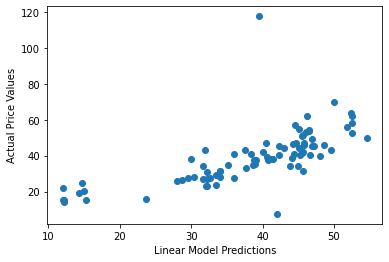

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x = lm_pred, y = Y_test)
plt.xlabel('Linear Model Predictions')
plt.ylabel('Actual Price Values')
plt.show()

In [13]:
## computing the MSE
np.mean((Y_test - lm_pred)**2)

127.90420997731024